<a href="https://colab.research.google.com/github/nehana4sph/TCS-iON_RIO-125-HR-Salary-Dashboard-/blob/main/Salary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Salary Classification Dataset/salary.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Check number of rows and columns, type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Understanding the numeric fields
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [ ]:
df['workclass'].replace(' ?', np.nan, inplace=True)
df['occupation'].replace(' ?', np.nan, inplace=True)
df['native-country'].replace(' ?', np.nan, inplace=True)

EXPLORATORY DATA ANALYSIS (EDA)

<ipython-input-14-39b01b66baae>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workclass', y='education-num', hue='salary', data=df, ci=None)


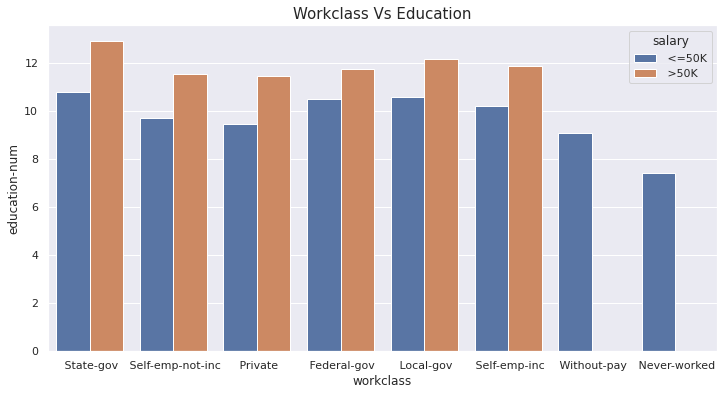

In [ ]:
sns.set()#sets the style of the plot.
fig = plt.figure(figsize=(12,6))#Used to display the plot
sns.barplot(x='workclass', y='education-num', hue='salary', data=df, ci=None)
plt.title("Workclass Vs Education", size=15)
plt.show()

In [ ]:
def draw_boxen_plot(feature, hue=None):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    sns.boxenplot(data=df, x='salary', y=feature, ax=ax, hue=hue)
    sns.set_style('whitegrid')
    ax.set_title('Salary VS '+feature.title())

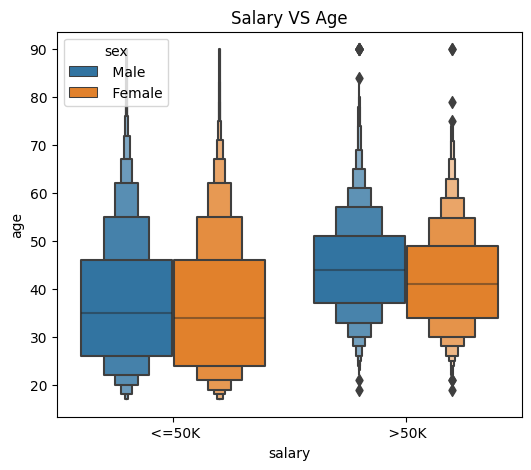

In [ ]:
draw_boxen_plot('age', 'sex')

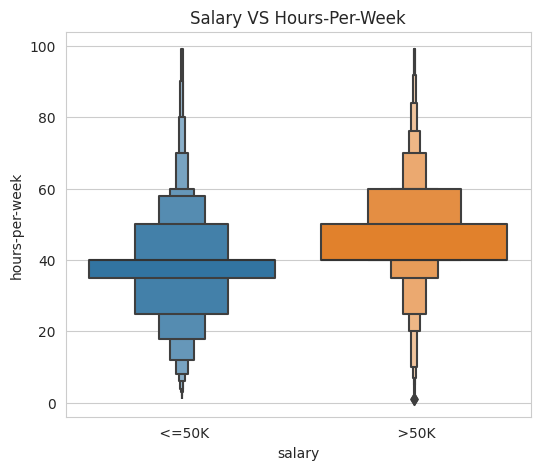

In [ ]:
draw_boxen_plot('hours-per-week')

Text(0.5, 1.0, 'Workclass VS Salary')

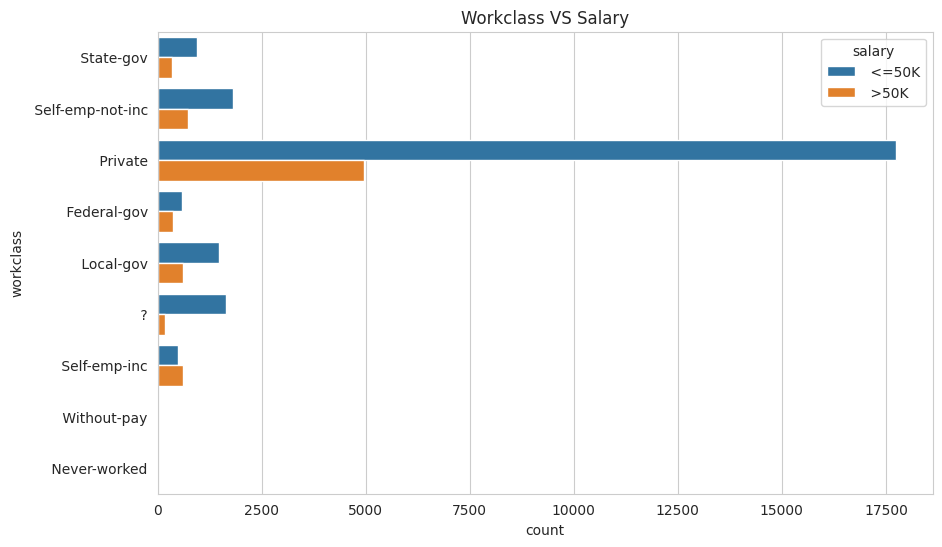

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df,y='workclass', hue='salary')
ax.set_title('Workclass VS Salary')


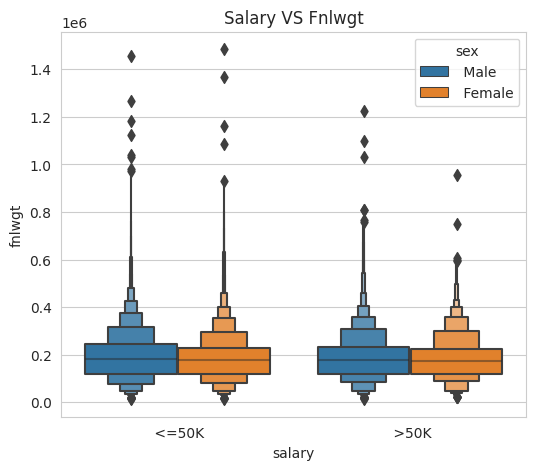

In [ ]:
draw_boxen_plot('fnlwgt', 'sex')

Text(0.5, 1.0, 'Education VS Salary')

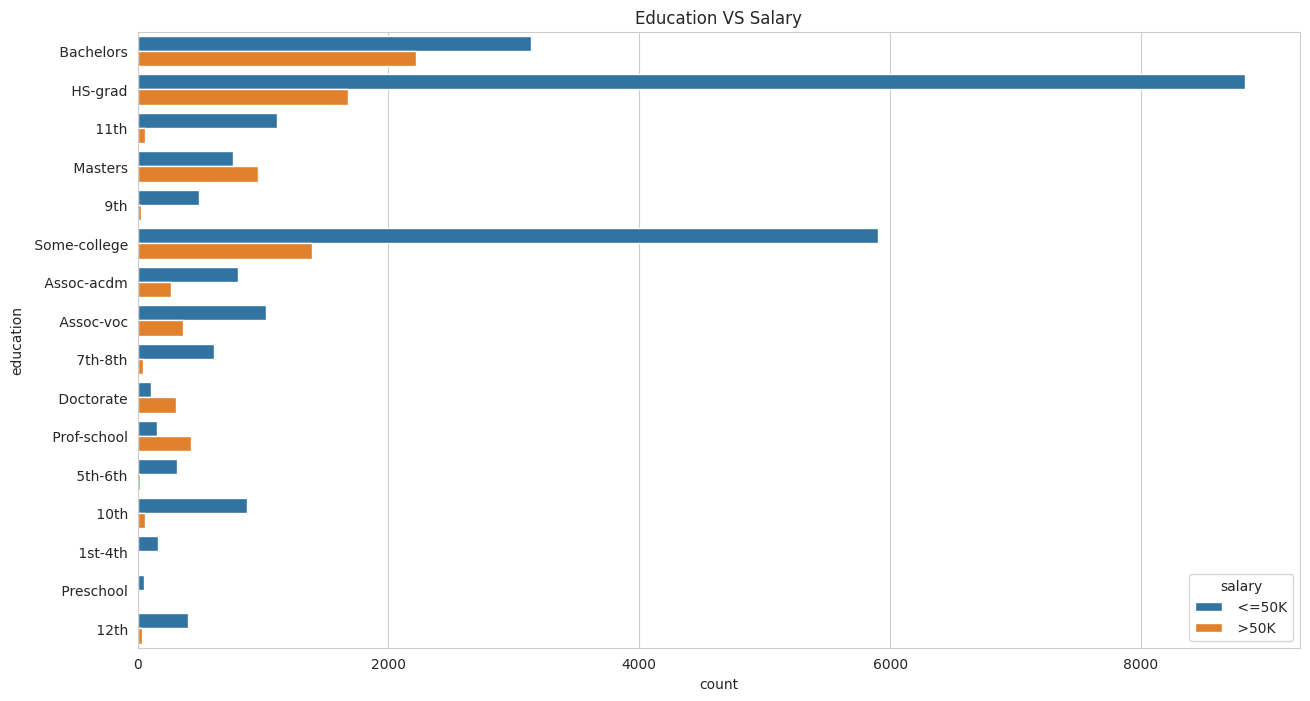

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df,y='education', hue='salary')
ax.set_title('Education VS Salary')

Text(0.5, 1.0, 'Race VS Salary')

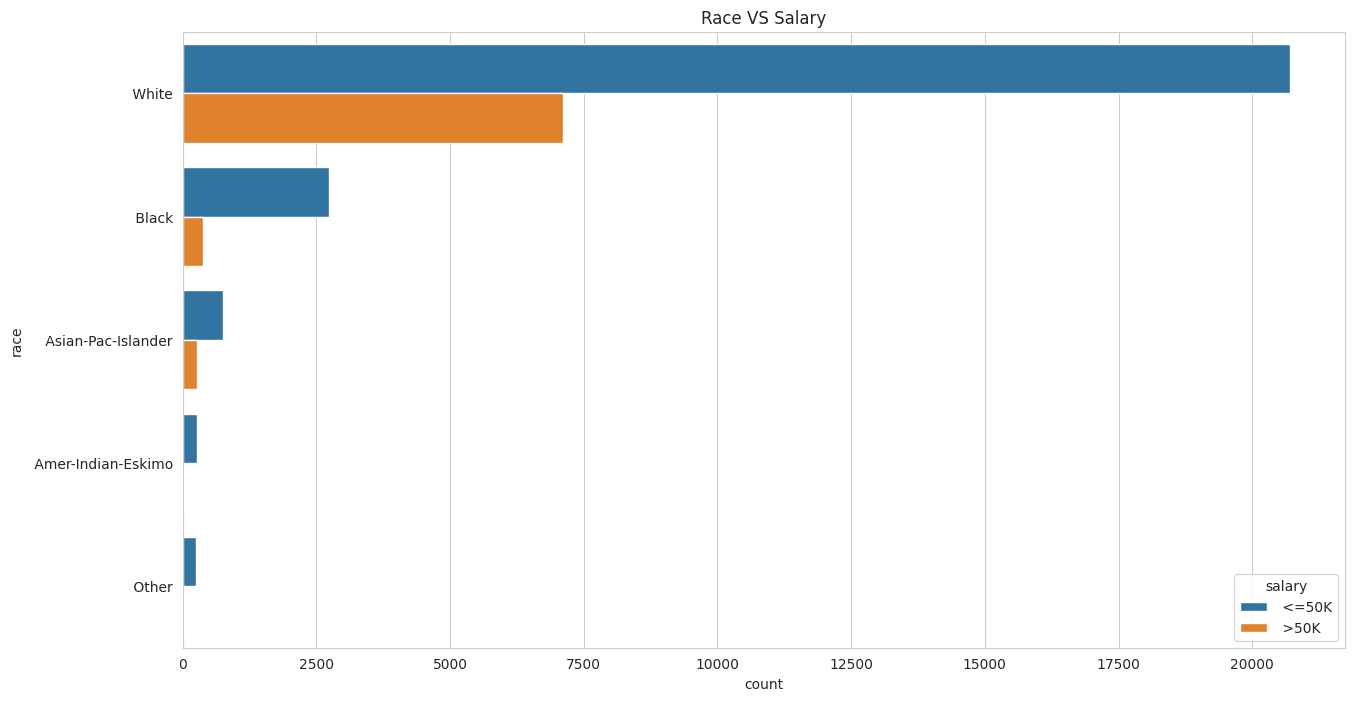

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df,y='race', hue='salary')
sns.set_palette('Accent_r')
ax.set_title('Race VS Salary')

<Axes: >

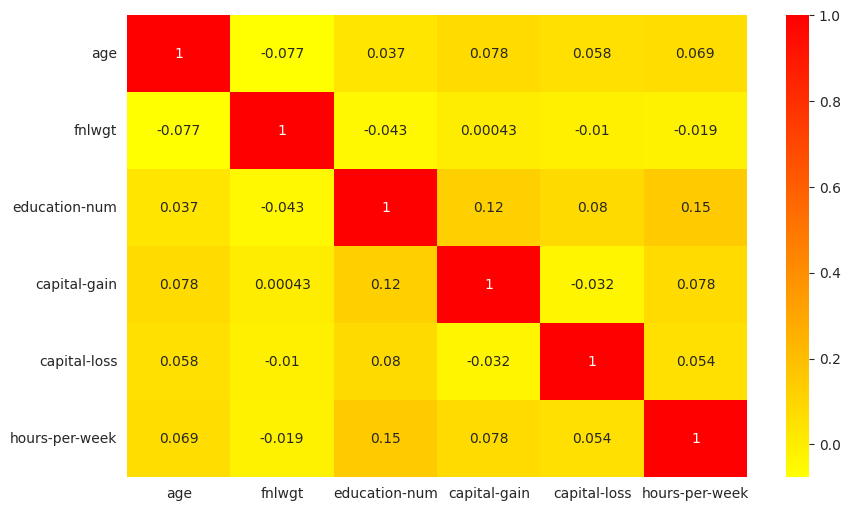

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='autumn_r')

In [ ]:
def crosstab_counts(feature, normalize=False):
    return pd.crosstab(
        index=df[feature],
        columns='Counts(%)',
        normalize=normalize
    ).apply(lambda x: round(x*100, 4)).sort_values(by='Counts(%)', ascending=False)

In [ ]:
crosstab_counts('salary', True).T

salary,<=50K,>50K
col_0,,
Counts(%),75.919,24.081


In [ ]:
crosstab_counts('sex', True).T

sex,Male,Female
col_0,,
Counts(%),66.9205,33.0795


In [ ]:
crosstab_counts('workclass', True).T

workclass,Private,Self-emp-not-inc,Local-gov,?,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
col_0,,,,,,,,,
Counts(%),69.703,7.8038,6.4279,5.6386,3.9864,3.4274,2.9483,0.043,0.0215


In [ ]:
crosstab_counts('education', True)

col_0,Counts(%)
education,
HS-grad,32.2502
Some-college,22.3918
Bachelors,16.4461
Masters,5.2916
Assoc-voc,4.2443
11th,3.6086
Assoc-acdm,3.2769
10th,2.8654
7th-8th,1.9840


In [ ]:
# marital-status counts
crosstab_counts('marital-status', True).T

marital-status,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
col_0,,,,,,,
Counts(%),45.9937,32.8092,13.6452,3.1479,3.0497,1.2837,0.0706


In [ ]:
# relationship count
crosstab_counts('relationship', True).T

relationship,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
col_0,,,,,,
Counts(%),40.5178,25.506,15.5646,10.5832,4.8156,3.0128


In [ ]:

crosstab_counts('race', True).T

race,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
col_0,,,,,
Counts(%),85.4274,9.5943,3.1909,0.9551,0.8323


In [ ]:
emp_df=df.copy()

In [ ]:
emp_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
emp_df['salary'] = emp_df['salary'].map({' >50K': 1, ' <=50K': 0})

In [ ]:
X = emp_df.iloc[:, :-1]
y = emp_df['salary']

In [ ]:
fs = ['native-country', 'fnlwgt']
X.drop(fs, axis=1, inplace=True)
del fs # delete fs variable

In [ ]:
for i in X.select_dtypes('object').columns:
    X[i], _ = X[i].factorize()
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,0,0,13,0,0,0,0,0,2174,0,40
1,50,1,0,13,1,1,1,0,0,0,0,13
2,38,2,1,9,2,2,0,0,0,0,0,40
3,53,2,2,7,1,2,1,1,0,0,0,40
4,28,2,0,13,1,3,2,1,1,0,0,40


In [ ]:
X.dtypes

age               int64
workclass         int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [ ]:
# spilt the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predict
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7625,  612],
       [1013, 1604]])

In [ ]:
# percentage
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy: ", accuracy * 100)

Accuracy:  85.02856089920766
